[Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)

[Folium Documentation](https://python-visualization.github.io/folium/quickstart.html#Getting-Started)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd

In [2]:
%cd '/content/drive/MyDrive/classes/4001 7001/SPRING 2022/MODULE 01'

/content/drive/MyDrive/classes/4001 7001/SPRING 2022/MODULE 01


In [ ]:
# !ls
# df = pd.read_csv('path to csv',)

In [ ]:
# def read_data('path to csv','no_row'):
#   df = pd.read_csv('path to csv',nrow='no_row')
#   return df 

In [3]:
def read_data(path, nrows):
  df = pd.read_csv(path,nrows=nrows)
  return df 

In [4]:
def format_data(df):
  df.columns = ['eventId', 'type', 'incident','main', 'cross', 'longitude', 'latitude', 'start', 'estStop', 'clear']
  df['start'] = pd.to_datetime(df['start'])  
  df['estStop']= pd.to_datetime(df['estStop'])
  df['clear']= pd.to_datetime(df['clear'])
  df['duration'] = (df['clear'] - df['start']).astype('timedelta64[m]')
  df['year'] = df['start'].dt.year
  df['dow'] = df['start'].dt.weekday
  df['hour'] = df['start'].dt.hour
  df['latitude']= df['latitude'].astype(int)/1000000
  df['longitude']= df['longitude'].astype(int)/1000000
  df = df[(df['duration']>0) & df['duration']<200]
  return df 

In [5]:
df = read_data('data/incidents.csv',10000)

In [7]:
df = format_data(df)

In [8]:
df.dtypes

eventId               int64
type                  int64
incident             object
main                 object
cross                object
longitude           float64
latitude            float64
start        datetime64[ns]
estStop      datetime64[ns]
clear        datetime64[ns]
duration            float64
year                  int64
dow                   int64
hour                  int64
dtype: object

In [9]:
df.head()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,year,dow,hour
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0.00000,0.00000,2011-11-28 15:59:00,2012-07-01 09:00:00,2012-03-29 21:35:00,176016.0,2011,0,15
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90.12828,38.64539,2012-03-05 08:35:00,2012-12-31 16:00:00,2012-04-19 06:33:00,64678.0,2012,0,8
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90.19520,38.54390,2012-03-07 14:28:00,2013-05-31 15:00:00,2012-04-19 06:34:00,61446.0,2012,2,14
3,100003,1024,Roadwork,I-270,AT IL 111,-90.06692,38.75780,2012-03-08 21:01:00,2012-07-05 15:00:00,2012-05-03 01:00:12,79439.0,2012,3,21
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90.18149,38.88084,2012-03-30 07:16:00,2012-03-30 15:00:00,2012-03-29 20:23:00,-653.0,2012,4,7


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# df[['dow','hour','eventId']].groupby(['dow','hour']).agg({'count'}).reset_index().tail()

In [18]:
df_grp = df[['dow','hour','eventId']].groupby(['dow','hour']).agg({'count'}).reset_index()
df_grp.columns = ['dow','hour','count']
result = df_grp.pivot(index='dow', columns='hour', values='count')

In [19]:
df_grp

,dow,hour,count
0,0,0,13
1,0,1,6
2,0,2,6
3,0,3,3
4,0,4,8
...,...,...,...
163,6,19,24
164,6,20,36
165,6,21,21
166,6,22,17


In [20]:
result

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,,,,
0,13,6,6,3,8,16,86,106,130,148,95,66,65,56,81,89,115,109,68,110,47,32,30,12
1,11,14,19,8,9,19,98,137,129,164,103,102,71,43,104,99,105,82,67,101,78,42,22,34
2,18,17,11,13,23,21,91,102,147,145,114,81,74,58,71,93,151,122,91,103,79,35,38,32
3,29,30,16,22,22,39,111,122,139,167,138,73,66,58,79,106,128,103,84,136,73,42,30,38
4,32,26,19,20,14,13,92,108,133,118,112,82,71,67,83,103,151,122,73,95,56,38,28,44
5,29,19,21,20,9,13,12,15,36,57,49,41,45,58,45,57,61,50,23,33,31,21,29,33
6,20,23,19,21,8,6,19,11,24,64,77,55,40,53,50,32,50,44,25,24,36,21,17,15


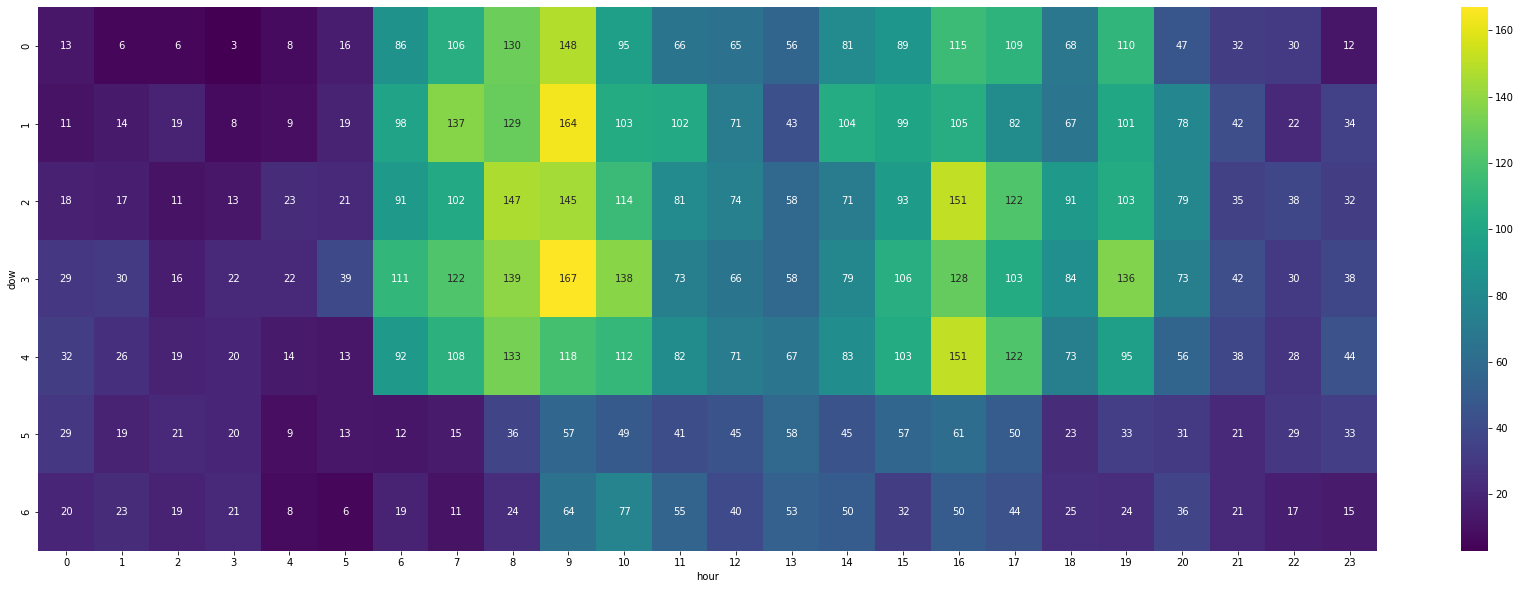

In [25]:
df_grp = df[['dow','hour','eventId']].groupby(['dow','hour']).agg({'count'}).reset_index()
df_grp.columns = ['dow','hour','count']
result = df_grp.pivot(index='dow', columns='hour', values='count')
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(result, annot=True, fmt="g", cmap='viridis', ax=ax)

In [26]:
import folium
from folium.plugins import HeatMap
from folium import plugins

In [33]:
mx = folium.Map([38.6, -90.199], zoom_start=12)

In [34]:
mx

In [ ]:
a, b = (1,2)

In [ ]:
print (b)

2


In [35]:
df.head()

,eventId,type,incident,main,cross,longitude,latitude,start,estStop,clear,duration,year,dow,hour
0,100000,1024,Roadwork,IL 140,JUST EAST OF IL-160,0.00000,0.00000,2011-11-28 15:59:00,2012-07-01 09:00:00,2012-03-29 21:35:00,176016.0,2011,0,15
1,100001,1024,Roadwork,I-55/70,AT IL 203,-90.12828,38.64539,2012-03-05 08:35:00,2012-12-31 16:00:00,2012-04-19 06:33:00,64678.0,2012,0,8
2,100002,1024,Roadwork,IL 3,STOLLE RD.,-90.19520,38.54390,2012-03-07 14:28:00,2013-05-31 15:00:00,2012-04-19 06:34:00,61446.0,2012,2,14
3,100003,1024,Roadwork,I-270,AT IL 111,-90.06692,38.75780,2012-03-08 21:01:00,2012-07-05 15:00:00,2012-05-03 01:00:12,79439.0,2012,3,21
4,100004,512,AccidentsAndIncidents,US 67,CLARK BRIDGE,-90.18149,38.88084,2012-03-30 07:16:00,2012-03-30 15:00:00,2012-03-29 20:23:00,-653.0,2012,4,7


In [41]:
a,b = (1,2)
print (a)
print (b)

1
2


In [44]:
for index, crow in df.head().iterrows():
  print (crow['latitude'], crow['longitude'])
  print ('..............')

0.0 0.0
..............
38.64539 -90.12828
..............
38.5439 -90.1952
..............
38.7578 -90.06692
..............
38.88084 -90.18149
..............


In [47]:
for index, row in df.head(5000).iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        popup=row['main'],
                        fill_color="#3db7e4", # divvy color
                      ).add_to(mx)

In [48]:
mx

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
mx = folium.Map([38.6, -90.199], zoom_start=11)
for index, row in df.head(5000).iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=2,
                        popup=row['main'],
                        fill_color="#3db7e4", # divvy color
                      ).add_to(mx)

In [ ]:
## point map
mx

Output hidden; open in https://colab.research.google.com to view.

In [49]:
df[['longitude','latitude']].head().to_numpy()

array([[  0.     ,   0.     ],
       [-90.12828,  38.64539],
       [-90.1952 ,  38.5439 ],
       [-90.06692,  38.7578 ],
       [-90.18149,  38.88084]])

In [51]:
## heatmap
my = folium.Map([38.6, -90.199], zoom_start=10)
stationArr = df[['latitude', 'longitude']].head(5000).to_numpy()
my.add_children(plugins.HeatMap(stationArr, radius=20,max_val=20))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


#### packaging code

In [ ]:
## 